# SETUP AND EXPLORATION OF THE DATA

I'll start by reading in the data to a pandas dataframe and using the documentation to set the column names. I'll also use the patient ID as the index. Print the head of the dataframe just to make sure the structure looks correct.

In [1]:
import numpy as np
import pandas as pd

cols = ["Thickness", "U Cell Size", "U Cell Shape", "Adhesion", "SE Cell Size", "Bare Nuclei", "Bland Chromatin",
       "Normal Nuclei", "Mitoses", "Class"]
patient_data = pd.read_csv("../breast-cancer-wisconsin.csv", header=None, index_col=0, names=cols)
patient_data.head(10)

,Thickness,U Cell Size,U Cell Shape,Adhesion,SE Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2
1033078,4,2,1,1,2,1,2,1,1,2


Let's describe() the dataframe to see if we can glean anything from the simple stats.

In [2]:
patient_data.describe()

,Thickness,U Cell Size,U Cell Shape,Adhesion,SE Cell Size,Bland Chromatin,Normal Nuclei,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


From the above we have learned a few things:

1) Bare nuclei doesn't show up in describe() because there is some data missing from that column which has been replaced with "?", making the column a mix of numeric and text data which trips up describe().

2) All of our variables range from 1-10. Shouldn't need to scale the input to our model.

3) The mean of the "Class" column is 2.7, so our dataset is imbalanced. We have more benign data than malignant data.

Let's check how many patients are missing the Bare Nuclei column

In [3]:
patient_data["Bare Nuclei"].value_counts()["?"]

16

Only 16 patients are missing the "Bare Nuclei" feature. This is a small enough number that dropping those patients from the dataset is unlikely to affect my future model performance, so I'll do that. At the same time, the classes being 2 (benign) or 4 (malignant) isn't really an issue but I would find it more intuitive to work with bools so let's use np.where to map our "Class" column to 0 = benign/False, 1 = malignant/True.

In [4]:
patient_data = patient_data[patient_data.loc[:,"Bare Nuclei"] != "?"]
patient_data["Bare Nuclei"] = pd.to_numeric(patient_data["Bare Nuclei"])
patient_data["Class"] = np.where(patient_data["Class"] == 4, 1, 0)
patient_data.describe()

,Thickness,U Cell Size,U Cell Shape,Adhesion,SE Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Next let's make a correlation heatmap to see how our features correlate with the class and with each other. Features that aren't correlated to the class won't add anything to the predictive power of our model so we can disregard them moving forward. If we find some features that are correlated to the class but also to each other (i.e. features that aren't indepedent) we may not need to keep all of them. We'll use matplotlib.pyplot and seaborn to make the heatmap.

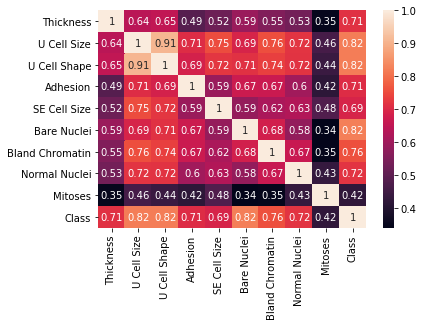

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(patient_data.corr(), annot=True)
plt.show()

All of our variables are (strongly) correlated to the class, so it should definitely be possible to build a good predictive model here. The strongest correlations are for U Cell Size, U Cell Thickness, and Bare Nuclei, while the weakest correlation is for Mitoses. Our variables are also strongly correlated with each other, in particular U Cell Size and U Cell Shape are almost perfectly correlated so there should be no need to use both of them as model inputs. but this does impact our model choice (Naive Bayes is definitely out). I'm going to cut off my exploration here, even though I'm sure there are more insights to be gleaned, as I've spent about an hour on it. Time to move on to model building!

# Data preparation and model building

I'm primarily going to use scikit-learn as it has many handy data preparation tools as well implementations of the models I would like to try.

Important note for validation: Based on the nature of the problem, the overall accuracy of the model is less important than the recall, i.e. True Positives / (True Positives + False Negatives). Ideally we would like to minimize both false positives and false negatives, but false negatives could lead to loss of life.

First things first I'll split our data into training and testing sets. I'll use the stratify argument to preserve the begnign/malignant imbalance in our split data. I'll start with a 50/50 split of training and testing data.

In [6]:
from sklearn.model_selection import train_test_split

# Dropping "U Cell Shape" here based on exploration above
X = patient_data[["Thickness", "U Cell Size", "Adhesion", "SE Cell Size", "Bare Nuclei", "Bland Chromatin",
       "Normal Nuclei", "Mitoses"]].to_numpy()
y = patient_data["Class"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

## Logistic regression

Let's start with a logistic regression model. Logistic regression is a good baseline since its quite simple, it will just try to find a (hyper)plane through the data that best splits it into the two classes. Based on the strong positive correlations between our features and classes, I'm expecting good performance even with this simple approach!

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

I've now trained a simple logistic regression model on the data with scikit-learn's default settings. The predictive power of this model should be a good baseline, and next I'll try to improve on it. Let's check the accuracy, precision, and recall, keeping in mind my note earlier that recall is the most important metric for model performance since a false negative means a patient with cancer will not get a correct diagnoses and might lose valuable treatment time as a result.

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = model.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))
print("Model precision:", precision_score(y_test, y_pred))
print("Model recall:", recall_score(y_test, y_pred))

Model accuracy: 0.9736842105263158
Model precision: 0.9512195121951219
Model recall: 0.975


As expected we get very good accuracy, precision, and recall even from this simple model. Before moving on, I'll try again with a more aggressive training/testing split (80/20) to see if this changes the metrics. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))
print("Model precision:", precision_score(y_test, y_pred))
print("Model recall:", recall_score(y_test, y_pred))

Model accuracy: 0.9635036496350365
Model precision: 0.9215686274509803
Model recall: 0.9791666666666666


Changing the train/test split fraction did result in some small changes but it's hard to say if they're significant. I'm going to try 5-fold cross-validation to improve my confidence in these results. I'm going to do this with sklearn's cross_val_score, which will not preserve the imbalance in the classes, if I get wonky results I'll switch to StratifiedKFold which does.

In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Accuracy: {0:.2f} +/- {1:.2f}".format(scores.mean(), 2*scores.std()))
scores = cross_val_score(model, X, y, cv=5, scoring="precision")
print("Precision: {0:.2f} +/- {1:.2f}".format(scores.mean(), 2*scores.std()))
scores = cross_val_score(model, X, y, cv=5, scoring="recall")
print("Recall: {0:.2f} +/- {1:.2f}".format(scores.mean(), 2*scores.std()))


Accuracy: 0.96 +/- 0.04
Precision: 0.96 +/- 0.08
Recall: 0.94 +/- 0.09


It's a little bit suspicious that this is the first time precision > recall, but the 95% confidence interval (the value after +/- above) on the cross-validation output is large enough that I don't think this is significant. I could try further tuning the logistic regression parameters, but based on the above our accuracy, precision, and recall are all consistent with 1 so even if I can squeeze more out of logistic regression its not clear the improvements would be statisticall significant.

## Support Vector Machines -- SVC

Next I will try scikit-learn's Support Vector Classification model. SVM's are effective in high dimensional spaces, and may do better than logistic regression here if the boundaries between the classes are not well represented by a simple (hyper)plane. I'll start from a 50/50 train/test split again.

In [11]:
from sklearn.svm import SVC

model_svc = SVC(gamma="auto")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))
print("Model precision:", precision_score(y_test, y_pred))
print("Model recall:", recall_score(y_test, y_pred))

Model accuracy: 0.9532163742690059
Model precision: 0.8880597014925373
Model recall: 0.9916666666666667


Recall has gone up with SVC at small cost to accuracy and precision. I'll try 5-fold cross-validation again to build confidence and get an idea of the error on the metrics.

In [12]:
scores = cross_val_score(model_svc, X, y, cv=5, scoring="accuracy")
print("Accuracy: {0:.2f} +/- {1:.2f}".format(scores.mean(), 2*scores.std()))
scores = cross_val_score(model_svc, X, y, cv=5, scoring="precision")
print("Precision: {0:.2f} +/- {1:.2f}".format(scores.mean(), 2*scores.std()))
scores = cross_val_score(model_svc, X, y, cv=5, scoring="recall")
print("Recall: {0:.2f} +/- {1:.2f}".format(scores.mean(), 2*scores.std()))

Accuracy: 0.95 +/- 0.07
Precision: 0.88 +/- 0.13
Recall: 0.99 +/- 0.02


Based on the 95% confidence interval on the recall metric, I think this is a clear improvement over logistic regression. With accuracy and recall this high I'm not sure its worth spending more time on improving the model itself, however given the nature of the problem, before releasing this product in the real world I would certainly spend more time on validation.

# Closing remarks, next steps

I've succeeded in building a model with almost perfect recall, which was my goal when I first started. As I mentioned above, I think the most important next step before using this model to in a real world situation would be further validation. As the dataset is relatively small, I would start by simply collecting more data and verifying that the model continues to perform the same. If the model continues to perform with a larger dataset, I would consult with medical experts, i.e. the end users of the model, as they might have a clearer idea of further validation steps. If the model does not continue to perform with more data, I would start by re-visiting the hyperparameters I used for the model training.

Based on the correlations I observed in my exploration of the data, I was already able to drop one of the features (either U Cell Size or U Cell Shape). Potentially Mitoses could be dropped as well as it has the weakest correlation to the classes. If the secondary goal is to reduce the cost of testing by eliminating some of the features in the dataset, I would start by removing features one at a time during training and checking the impact on my metrics, with a focus on recall as usual. That would give me candidates for features that can be removed without impacting the metrics, and I would continue iteratively dropping two, three, etc features at a time before training and validate that performance is maintained. There may be an automated way to do this...

It's a little bit difficult to say how a physician would use this model since I received the data in a very clean format. Would a physician usually have all of these features in a single chart? Would they have to request multiple tests which might vary in how long they take to perform? In any case, the simplest product form I can think of is a simple desktop computer app that takes each of the feature values in a text box and outputs "benign" or "malignant" from the model. A leveled up product might be able to scan the documentation that comes back from each test to find the feature values to reduce data entry time for the physician.


